# K-Nearest Neighbours(KNN)

In [1]:
#KNN K-nearest neighbors
#classification algorithm
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('gene_expression.csv')
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


In [4]:
df.shape

(3000, 3)

In [5]:
df.describe()

,Gene One,Gene Two,Cancer Present
count,3000.000000,3000.000000,3000.000000
mean,5.600133,5.410467,0.500000
std,1.828388,1.729081,0.500083
min,1.000000,1.000000,0.000000
25%,4.300000,4.000000,0.000000
50%,5.600000,5.400000,0.500000
75%,6.900000,6.700000,1.000000
max,10.000000,10.000000,1.000000


## EDA

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

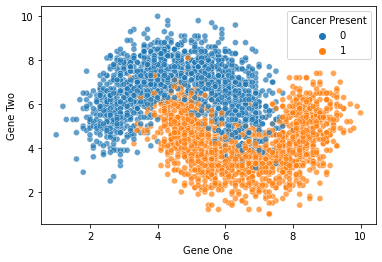

In [6]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

#### For cancer present, the Gene 1 value ranges from 4-10 and Gene 2 value range from 1-6

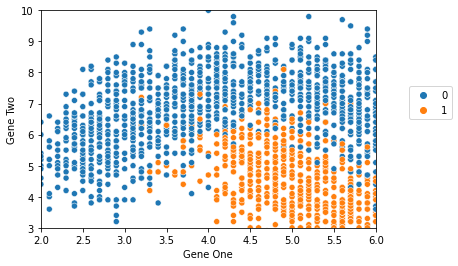

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df)
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

### For cancer present, the Gene 1 value ranges from 4-6 and Gene 2 value range from 3-7


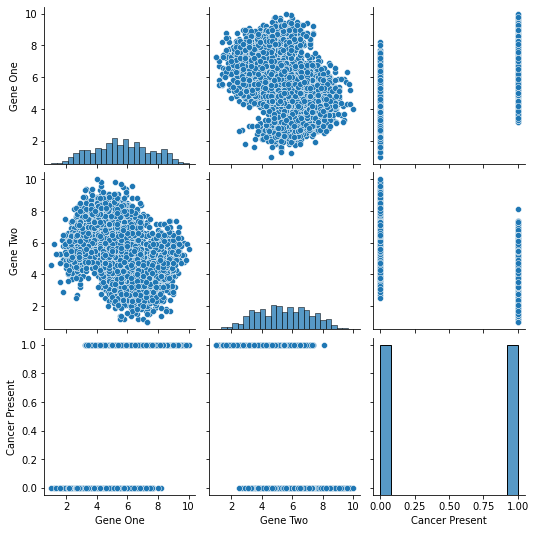

In [9]:
sns.pairplot(df)

<AxesSubplot:xlabel='Gene One'>

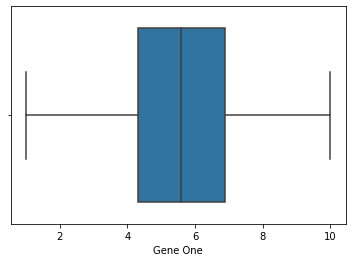

In [10]:
import warnings
warnings.filterwarnings('ignore')
sns.boxplot(df['Gene One'],data=df)

In [11]:
x=df.corr()
x

,Gene One,Gene Two,Cancer Present
Gene One,1.000000,-0.375427,0.545854
Gene Two,-0.375427,1.000000,-0.692352
Cancer Present,0.545854,-0.692352,1.000000


<AxesSubplot:>

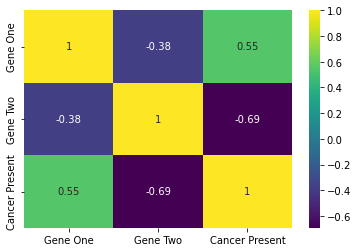

In [12]:
sns.heatmap(x,annot=True,cmap='viridis')

Text(0.5, 1.0, 'Cancer-Present')

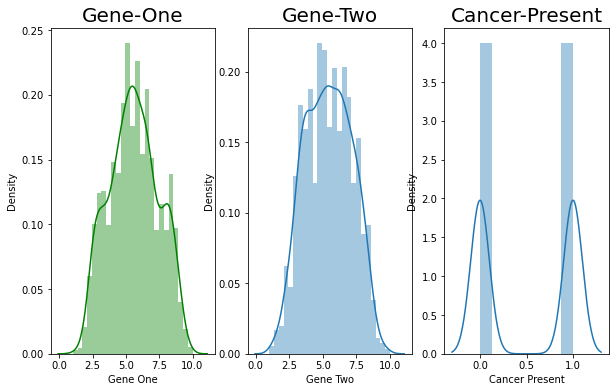

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.title('Gene-One',fontsize=20)
sns.distplot(df['Gene One'],color='green')

plt.subplot(1,3,2)
sns.distplot(df['Gene Two'])
plt.title('Gene-Two',fontsize=20)

plt.subplot(1,3,3)
sns.distplot(df['Cancer Present'])
plt.title('Cancer-Present',fontsize=20)

### Train|Test Split and Scaling Data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape

(2100, 2)

In [18]:
X_test.shape

(900, 2)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn=KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
predictions=knn.predict(scaled_X_test)
predictions

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [25]:
data={'Actual':y_test,"Predicted":predictions}
pd.DataFrame(data)

,Actual,Predicted
1801,1,1
1190,1,1
1817,1,1
251,0,0
2505,0,0
...,...,...
2443,1,0
856,0,0
1983,1,1
166,0,1


In [26]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [27]:
accuracy_score(y_test,predictions)

0.8922222222222222

In [28]:
confusion_matrix(y_test,predictions)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



## Elbow Method to choose K value

In [30]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i=knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
#error rate = avg error rate = avg where predictions were not equal to actual test values.

In [31]:
error_rate

[0.10777777777777778,
 0.1,
 0.07444444444444444,
 0.07666666666666666,
 0.07222222222222222,
 0.06444444444444444,
 0.06444444444444444,
 0.06222222222222222,
 0.06,
 0.06222222222222222,
 0.06222222222222222,
 0.06,
 0.06222222222222222,
 0.06222222222222222,
 0.06,
 0.056666666666666664,
 0.05555555555555555,
 0.05555555555555555,
 0.05333333333333334,
 0.05333333333333334,
 0.05444444444444444,
 0.051111111111111114,
 0.05444444444444444,
 0.05444444444444444,
 0.056666666666666664,
 0.056666666666666664,
 0.05555555555555555,
 0.057777777777777775,
 0.057777777777777775,
 0.052222222222222225,
 0.05555555555555555,
 0.05333333333333334,
 0.05555555555555555,
 0.05333333333333334,
 0.05444444444444444,
 0.05444444444444444,
 0.05555555555555555,
 0.05444444444444444,
 0.05444444444444444]

Text(0, 0.5, 'Error Rate')

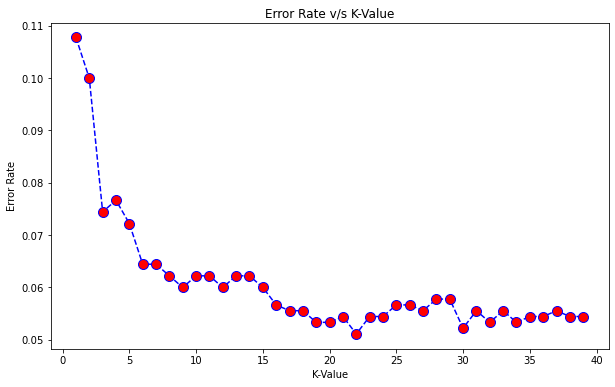

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markersize=10,markerfacecolor='red')
plt.title("Error Rate v/s K-Value")
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

In [33]:
#from elbow method we got k=22 because it has lowest error rate
knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(scaled_X_train,y_train)
pred_22=knn.predict(scaled_X_test)

In [34]:
accuracy_score(y_test,pred_22)

0.9488888888888889

# K-Value by Hyper Parameter tuning

In [35]:
knn=KNeighborsClassifier()

In [36]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
k_values = list(range(1,40))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


In [39]:
param_grid={'n_neighbors':k_values,'p':[1,2]}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'p': [1, 2]}


In [40]:
grid_model=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,scoring='accuracy')
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'p': [1, 2]},
             scoring='accuracy')

In [41]:
grid_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 37,
 'p': 1,
 'weights': 'uniform'}

In [42]:
grid_pred=grid_model.predict(scaled_X_test)

In [43]:
accuracy_score(y_test,grid_pred)

0.9477777777777778

In [44]:
single_sample = X_test.iloc[40]

In [45]:
single_sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [46]:
single_sample.values.reshape(1, -1)

array([[3.8, 6.3]])

In [47]:
grid_model.predict(single_sample.values.reshape(1, -1))

array([1], dtype=int64)

In [48]:
y_test.iloc[40]

0